## Image Coverage vs Container Counts

In [190]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import os

In [191]:
province = 'krabi'
province2 = 'Krabi'

In [192]:
data = pd.read_csv(os.path.join('Data','Scatter','ImageCount_'+province+'.csv'), index_col = 0)
data.columns = ['addrcode','Image Coverage [%]','Container Counts']
data.head()

,addrcode,Image Coverage [%],Container Counts
0,810103,9.72,1039
1,810105,3.75,76
2,810106,3.66,396
3,810111,2.42,146
4,810115,7.16,339


Text(0.5,1,'Image Coverage vs Container Counts in Krabi')

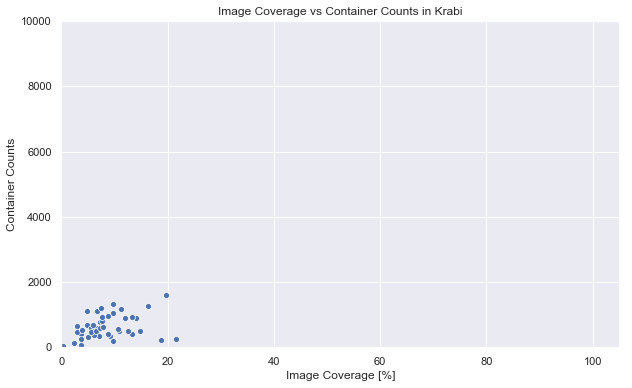

In [193]:
ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x="Image Coverage [%]", y="Container Counts", data=data)
ax.set(ylim=(0, 10000), xlim=(0,105))
ax.set_title("Image Coverage vs Container Counts in " + province2)


## Population vs Container Counts

In [194]:
data = pd.read_csv(os.path.join('Data','Scatter','PopCount.csv'), index_col = 0)
data['addrcode'] = data['addrcode'].astype(str)
data.columns = ['addrcode','Population','Container Counts','Pop Density']
list = []
for i in range(len(data)):
    if data['addrcode'][i][:2] == '10':
        list.append('Bangkok')
    elif data['addrcode'][i][:2] == '80':
        list.append('NST')
    elif data['addrcode'][i][:2] == '81':
        list.append('Krabi')
data['Province'] = list
data.head()

,addrcode,Population,Container Counts,Pop Density,Province
0,1001,50708,2527,1018.028508,Bangkok
1,1002,91338,1158,1721.085359,Bangkok
2,1003,166831,7432,83.232389,Bangkok
3,1004,37675,1956,1011.137950,Bangkok
4,1005,187466,14879,492.631524,Bangkok


In [195]:
data['Pop Density'] = data['Pop Density']/(data['Pop Density'].max())

[(0, 16000), (0, 200000)]

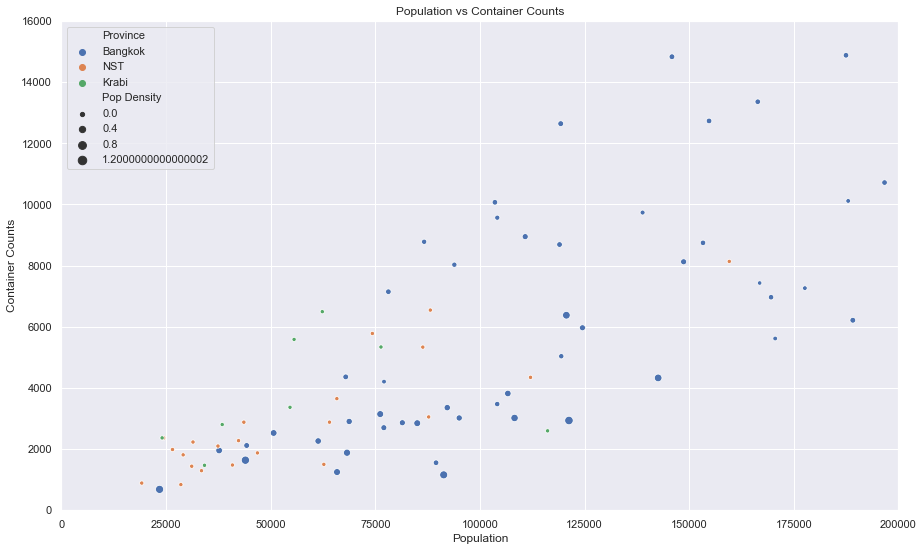

In [197]:
ax = plt.subplots(figsize=(15,9))
kws = dict(s=100, linewidth=.5, edgecolor="w")
ax = sns.scatterplot(x="Population" ,y="Container Counts" ,hue = "Province" ,size ='Pop Density', data=data)
ax.set_title("Population vs Container Counts")
ax.set(ylim=(0, 16000), xlim=(0,200000))